# PROJECT TKO 7069 STATISTICAL DATA ANALYSIS

## PREFACE

Each category will be evaluated for extent, correctness and overall quality. For full points, you must thoroughly demonstrate that you understand the relevant statistical theories and are able to correctly apply them as well as that you can skillfully execute and report a statistical analysis. Partial points can be obtained for an incomplete or imperfect solution, provided that your approach is correct. It is therefore recommended that you show your best attempt even if you know it is not fully correct.



## INSTRUCTIONS

As you know, some time ago we launched a survey to gain information on living habits of individual persons and households. The survey data is now available for analysis. Your task is to analyse which activities people spend their time on and whether there are differences between groups.

The files `habits.data` and `habits.txt` contain the data and its documentation, respectively. Given that the complete data set is huge, we need you to focus on specific parts of the data. Use only the following variables in your analysis:


* kohde
* jasen
* pvknro
* sp
* IKAL1
* ASALUE
* V1
* V32
* V68
* V75
* H1b_A
* H1i_A




In [17]:

import matplotlib
import pandas as pd
import sklearn.cluster as SC
import sklearn.decomposition as SD
import sklearn.preprocessing as SP
import numpy as np
from pprint import pprint 

In [18]:
df = pd.read_table("habits.data", sep=";", na_values=["?"])

In [19]:
columns = [
    "household_ID",
    "member_ID",
    "day_of_week",
    "sex",
    "age_group",
    "living_environment",
    "V1 - working",
    "V5 - cooking",
    "V7 - washing dishes",
    "V21 - childcare",
    "V22 - reading and playing with children",
    "V32 - sleeping",
    "V33 - dining",
    "V68 - reading",
    "V69 - listening to radio",
    "V70 - watching TV",
    "V27 - shopping",
    "V40 - studying in school",
    "V75 - phonecall",
    "H1a_A - cinema",
    "H1b_A - theater",
    "H1g_A - museum",
    "H1h_A - library",
    "H1a_A - cinema"
]



### DATA PREPARING

In [20]:

cols=["kohde",
    "jasen",
    "pvknro",
    "sp",
    "IKAL1",
    "ASALUE",
    "V1",
    "V32",
    "V68",
    "V75",
    "H1b_A",
    "H1i_A",
]



df = df[df.columns[df.columns.isin(cols)]]

print(df.to_string())


     kohde  jasen  pvknro  sp  ASALUE  IKAL1     V1    V32    V68    V75  H1b_A  H1i_A
0    50002      1       2   1     1.0      6    380    450     10      0    2.0    1.0
1    50002      2       2   2     1.0      6    470    480     40      0    2.0    1.0
2    50009      1       2   2     1.0      7    350    460     80      0    1.0    1.0
3    50011      1       2   2     3.0      4    360    430      0      0    1.0    1.0
4    50012      1       1   2     1.0      8      0    600     10      0    1.0    2.0
5    50015      1       1   1     3.0      8      0    450    310      0    1.0    2.0
6    50015      2       1   2     3.0      8      0    490     40      0    1.0    2.0
7    50022      1       1   2     1.0      6    480    570      0    NaN    2.0    2.0
8    50024      1       2   1     1.0      4    680    490      0      0    2.0    2.0
9    50030      1       2   1     2.0      6      0    570     70      0    1.0    1.0
10   50030      2       2   2     2.0      

In [21]:

# import regular expression

import re
 
def format_to_mins(entry):
    """
    Searches for regex pattern containing [:digit:][:digit:]:[:digit:][:digit:]
    multiplies slice [0] with * 60 get mins and adds values together
    """
    # if match with string version of datapoint coming in as variable `entry`
    if re.search(r'\d{2}:\d{2}', str(entry)):
         # split it 
        st = str(entry).split(":")
         # min+sec converted to mins in float
        print(f'original value: {entry}, modified to ====> {((int(st[0])*60) + int(st[1]))}')
        return (int(st[0])*60) + int(st[1])
    else:
        # if already right format
        return entry


In [22]:
for a in df:
    df[a] = df[a].apply(format_to_mins)

original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 07:00, modified to ====> 420
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 11:30, modified to ====> 690
original value: 09:20, modified to ====> 560
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 07:20, modified to ====> 440
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
original value: 00:00, modified to ====> 0
ori


    kohde (household ID)
    jasen (member ID within household)
    pvknro (day of the week, 1 = working day, 2 = weekend)
    sp (sex, 1 = male, 2 = female)
    IKAL1 (
    1: 10-14 years old
    2: 15-19 years old
    3: 20-24 years old
    4: 25-34 years old
    5: 35-44 years old
    6: 45-54 years old
    7: 55-64 years old
    8: 65-74 years old
    9: 75- years old
    )
    ASALUE (1 = city, 2 = municipality, 3 = rural area)
    V1 (working)
    V32 (sleeping)
    V68 (reading)
    V75 (phonecall)
    H1b_A (theater, visited? 1 = yes, 2 = no)
    H1i_A (sport event, visited? 1 = yes, 2 = no)



# using dictionary to convert specific columns
convert_dict = {'A': int,
                'C': float
                }

In [42]:
df.pvknro = pd.Categorical(df.pvknro).rename_categories({1: "working_day",
                                                         2: "weekend"})
df.sp = pd.Categorical(df.sp).rename_categories({1: "male", 2: "female"})
df.IKAL1 = pd.Categorical(df.IKAL1).rename_categories({
    1: "10-14 years old",
    2: "15-19 years old",
    3: "20-24 years old",
    4: "25-34 years old",
    5: "35-44 years old",
    6: "45-54 years old",
    7: "55-64 years old",
    8: "65-74 years old",
    9: "10-14 years old"})
df.ASALUE = pd.Categorical(df.ASALUE).rename_categories({1: "city", 2: "municipality", 3: "rural area"})
df.H1b_A = pd.Categorical(df.H1b_A).rename_categories({1: "yes", 2: "no"})
df.H1i_A = pd.Categorical(df.H1b_A).rename_categories({1: "yes", 2: "no"})

convert_dict = {"V1": int,
                "V32": int,
                "V68": int,
                "V75": int,
               }

df = df.astype(convert_dict)
print(df.dtypes)


ValueError: cannot convert float NaN to integer

In [41]:
df

,kohde,jasen,pvknro,sp,ASALUE,IKAL1,V1,V32,V68,V75,H1b_A,H1i_A
0,50002,1,weekend,male,city,45-54 years old,380,450,10,0,no,no
1,50002,2,weekend,female,city,45-54 years old,470,480,40,0,no,no
2,50009,1,weekend,female,city,55-64 years old,350,460,80,0,yes,yes
3,50011,1,weekend,female,rural area,25-34 years old,360,430,0,0,yes,yes
4,50012,1,working_day,female,city,65-74 years old,0,600,10,0,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
775,51980,1,weekend,female,municipality,45-54 years old,460,450,30,10,yes,yes
776,51981,1,weekend,female,city,35-44 years old,0,790,0,40,yes,yes
777,51981,2,weekend,male,city,35-44 years old,0,730,0,0,NaN,NaN
778,51982,1,weekend,female,city,45-54 years old,0,490,40,10,no,no


### TASK 1

Characterise the individuals that are present in the data. Are there groups of similar persons?

### TASK 2

Estimate how much time on average households spend daily on each activity.

### TASK 3

With respect to which activities do men and women differ?

### TASK 4

With respect to which activities do working days and weekends differ?

### TASK 5

Which activities are associated with each other?

In [10]:
df_activities = df[df.columns[df.columns.isin(["V1","V32","V68","V75"])]]

In [11]:
df_activities

,V1,V32,V68,V75
0,380,450,10,0
1,470,480,40,0
2,350,460,80,0
3,360,430,0,0
4,0,600,10,0
...,...,...,...,...
773,0,610,0,10
774,0,570,0,0
775,460,450,30,10
776,0,790,0,40


In [12]:
df_activities = df_activities.fillna(0)
df_activities.isna().sum()



V1     0
V32    0
V68    0
V75    0
dtype: int64

In [13]:

# chosen columns from original dataframe
activity_columns = ["V1","V32","V68","V75"]

# loop through the columns array
#for a in activity_columns:
#   df_activities[a] = df_activities[a].apply(format_to_mins)
#df_activities["V32"].apply(format_to_mins)



ValueError: 'c' argument has 703 elements, which is inconsistent with 'x' and 'y' with size 772.

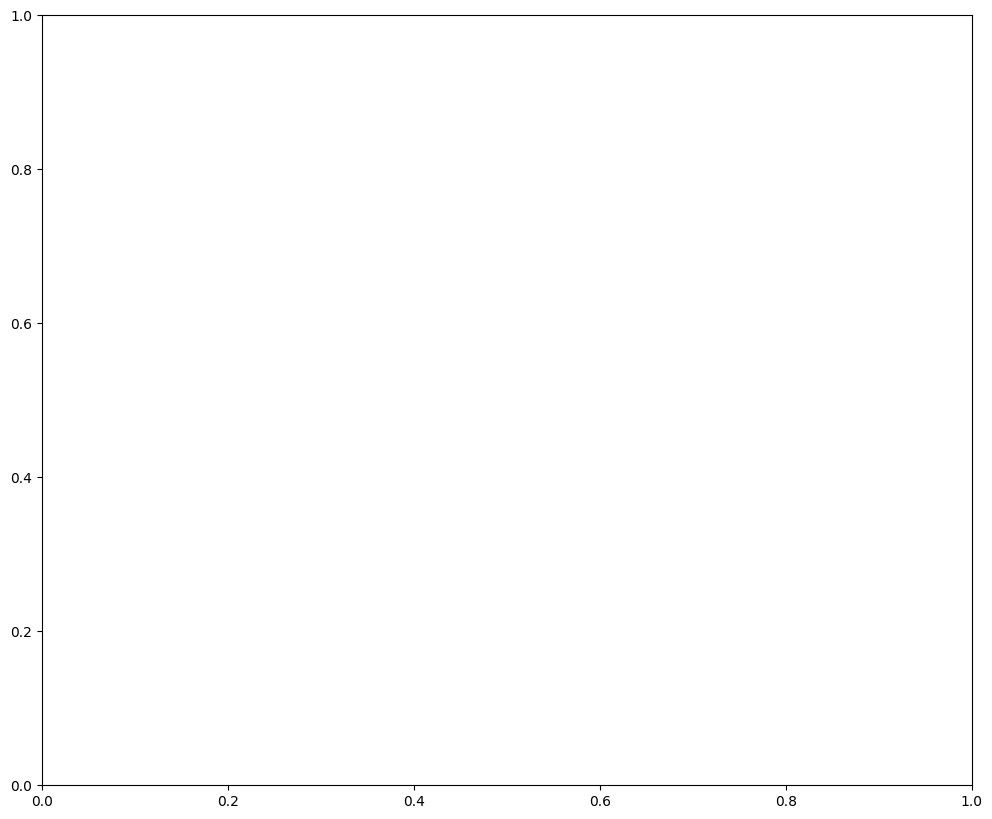

In [14]:

# # standardise variables to get similar variances
df_standardised = SP.StandardScaler().fit(df_activities).transform(df_activities)
# # create PCA model
pca = SD.PCA().fit(df_standardised)
# # transform data into new space
df_pca = pd.DataFrame(pca.transform(df_standardised))
# # add transformed data back to original data frame
df_ext = pd.concat([df, df_pca], axis=1)

# # visualise the first two PCA components and
# # colour data points by seed variety
df_ext.plot.scatter(0, 1, c=df_activities.index , colormap='brg', figsize=(12,10))

# observation: seed varieties are clearly separated



In [ ]:
# extract PCA component loadings
pd.DataFrame(pca.components_, columns=df_activities.columns)


In [ ]:


# create k-means model with three clusters
kmeans = SC.KMeans(n_clusters=3).fit(df_standardised)
# get memberships of data points in clusters
predictions = kmeans.predict(df_standardised)
# add memberships back to original data frame
df_ext['cluster'] = pd.Categorical(predictions)

# visualise the first two PCA components and
# colour data points by cluster membership
df_ext.plot.scatter(0, 1, c='cluster', colormap='brg', figsize=(12,10))

# observation: clusters created by k-means are very similar to seed varieties

